# Mini-Project 2: Viral prediction

Date: 2021.11.02

Solution author: © 2021 [Muruganantham Jaisankar](https://www.linkedin.com/in/jaimuruganantham/)  
Template author: © 2021 [Mantas Lukoševičius](https://mantas.info/)

This notebook is part of an individual project for [KTU IF](https://fi.ktu.edu/)  [P176M010 Advanced Machine Learning](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [M. Lukoševičius](http://mantas.info/).

You should only eddit this notebook where it is allowed, comment on all of your improvements in markdown cells and in your presentation.

Here we analyze open COVID-19 data from https://ourworldindata.org/coronavirus and try to predict new cases in the world for one week into the future.

## Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Download the data to cache locally. Do this once (a day), and comment out again, not to DoS the server. (adopted from https://stackoverflow.com/a/35997720).

In [2]:
# #'''
# import requests
# fname = 'owid-covid-data.csv'
# url = 'https://covid.ourworldindata.org/data/' + fname
# r = requests.get(url)
# open(fname, 'wb').write(r.content)
# #''';

Load the file to Pandas.

In [3]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# download the file locally when developing, not to DoS the server:
#url = "owid-covid-data.csv" 
df = pd.read_csv(url, parse_dates=[3])

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
df[df.iso_code=='IND'][['date','new_cases']].set_index('date')

,new_cases
date,
2020-01-30,1.0
2020-01-31,0.0
2020-02-01,0.0
2020-02-02,1.0
2020-02-03,1.0
...,...
2021-11-09,11466.0
2021-11-10,13091.0
2021-11-11,12516.0


The time series to predict.

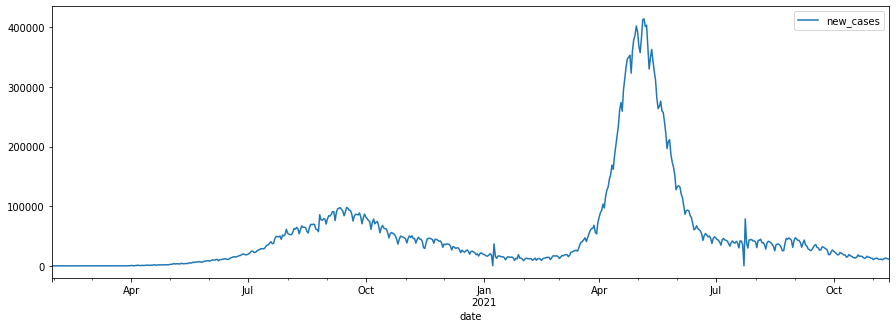

In [6]:
time_series = df[df.iso_code=='IND'][['date','new_cases']].set_index('date')
time_series.plot(figsize=(15,5),logy=False)

Error measure used to evaluate your solution is Root Mean Square Log Error (RMSLE), square-root of 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error.

In [7]:
from sklearn.metrics import mean_squared_log_error
def RMSLE(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

Maximum execution time in seconds and days to predict

In [8]:
import time
max_prediction_time = 3*60
days_to_predict = 7

# My models

<span style="color:red">This is the main section which you should rewrite and expand significanlty providing/documenting your models tried and results with them.</span>

**Here you define your different prediction models. Each model should be in a function that takes the dataframe up to the training_end_date as input and outputs prediction of OWID_WRL new_cases for the following 7 days. The models should only use the data that they get as input! Training, possible hyperparameter optimization, and prediction should be done inside this function. The execution should take no longer than 3 minutes on Google Colab nachine with Tesla**

Give links to the sources of the models and the ideas!

Execution of this section should not take long (no training here, just definition of functions ;).

In [9]:
#Getting the cases in India
india_case=df[df["location"]=="India"] 

In [10]:
india_case.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
54513,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
54514,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
54515,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
54516,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
54517,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


In [11]:
india_case.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
55162,IND,Asia,India,2021-11-09,34388579.0,11466.0,11491.286,461849.0,460.0,379.714,24679.457,8.229,8.247,331.453,0.330,0.273,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1151982.0,617223931.0,442.960,0.827,1001942.0,0.719,0.011,87.2,samples tested,1.092148e+09,743984381.0,348163758.0,NaN,3912102.0,3204213.0,78.38,53.39,24.99,NaN,2300.0,NaN,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
55163,IND,Asia,India,2021-11-10,34401670.0,13091.0,11520.714,462189.0,340.0,362.429,24688.852,9.395,8.268,331.697,0.244,0.260,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1278728.0,618502659.0,443.877,0.918,1031972.0,0.741,0.011,89.6,samples tested,1.097806e+09,745597244.0,352209127.0,NaN,5658232.0,3249564.0,78.79,53.51,25.28,NaN,2332.0,NaN,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
55164,IND,Asia,India,2021-11-11,34414186.0,12516.0,11490.286,462690.0,501.0,402.429,24697.835,8.982,8.246,332.056,0.360,0.289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399405.0,619902064.0,444.882,1.004,1079328.0,0.775,0.011,93.9,samples tested,1.102776e+09,746872225.0,355903367.0,NaN,4969221.0,3666896.0,79.14,53.60,25.54,NaN,2632.0,NaN,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
55165,IND,Asia,India,2021-11-12,34426036.0,11850.0,11621.857,463245.0,555.0,425.714,24706.339,8.504,8.341,332.454,0.398,0.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1165286.0,621067350.0,445.718,0.836,1149962.0,0.825,NaN,NaN,samples tested,1.111423e+09,749179463.0,362243853.0,NaN,8647724.0,4804242.0,79.76,53.77,26.00,NaN,3448.0,NaN,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
55166,IND,Asia,India,2021-11-13,34437307.0,11271.0,11685.429,463530.0,285.0,391.286,24714.428,8.089,8.386,332.659,0.205,0.281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.119180e+09,751481608.0,367698745.0,NaN,7757037.0,5571839.0,80.32,53.93,26.39,NaN,3999.0,NaN,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

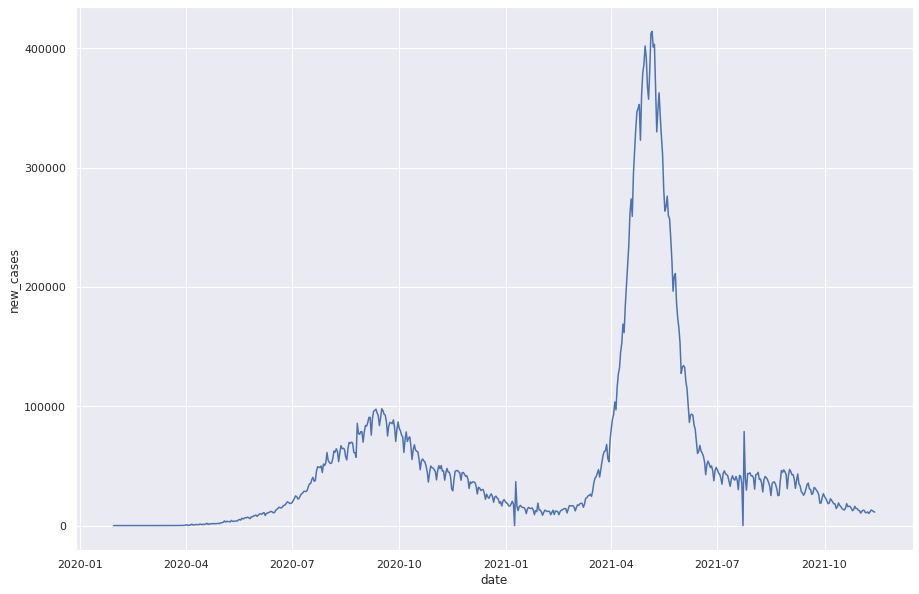

In [50]:
#Total cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="new_cases",data=india_case)
plt.show()

In [14]:
#Making a dataframe for last 7 days
india_last_7_days=india_case.tail(7)

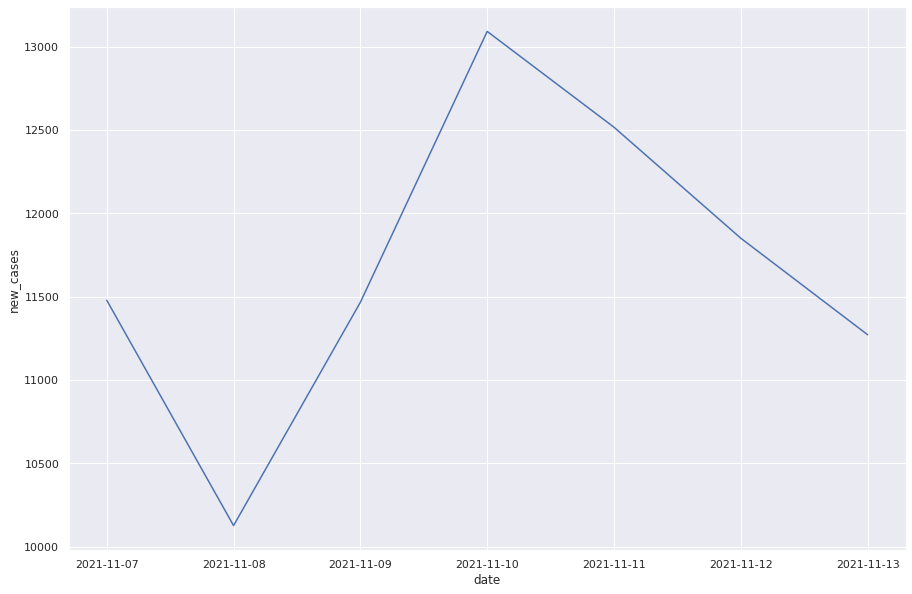

In [51]:
#Total cases in last 7 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="new_cases",data=india_last_7_days)
plt.show()

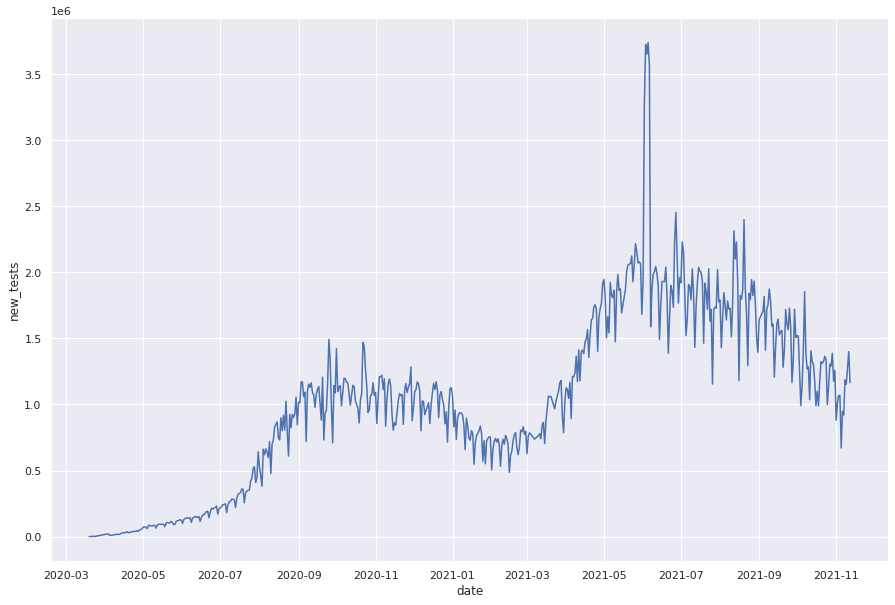

In [52]:
#Total tests per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="new_tests",data=india_case)
plt.show()

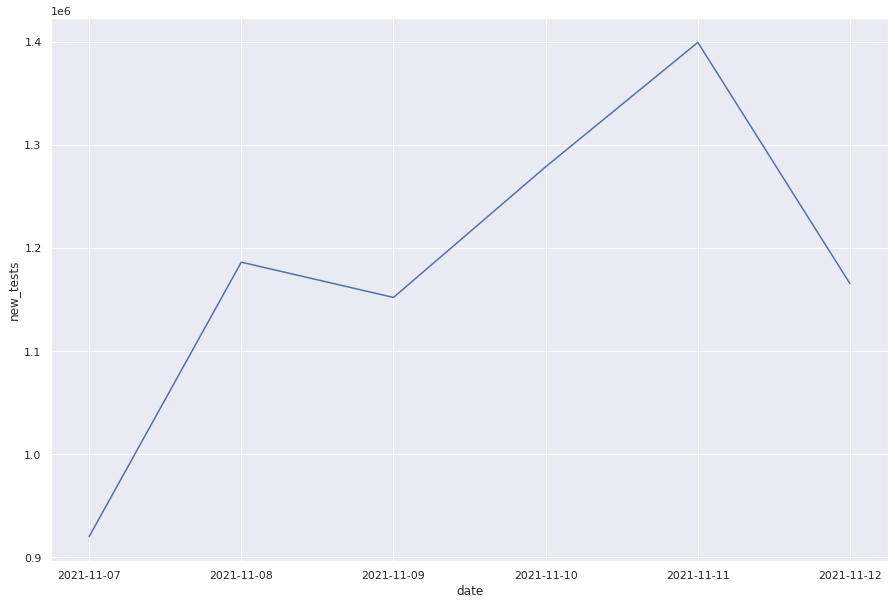

In [53]:
#Total tests in last 7 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="new_tests",data=india_last_7_days)
plt.show()

## 1.Linear Regressive model

In [18]:
#Linear regression
from sklearn.model_selection import train_test_split

In [58]:
#converting string date to date-time
import datetime as dt
from sklearn.linear_model import LinearRegression
def LenearReg(india_case):
  #Getting the cases in India
  india_case = df[df["location"]=="India"] 
  india_case['date'] = pd.to_datetime(india_case['date']) 
  #india_case.head()
  #converting date-time to ordinal
  india_case['date'] = india_case['date'].map(dt.datetime.toordinal)
  india_case.head()
  #getting dependent variable and inpedent variable
  x = india_case['date']
  y = india_case['new_cases']
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
  lr = LinearRegression()
  lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
  y_pred = lr.predict(np.array(x_test).reshape(-1,1))
  return abs(y_pred[-7:])

## 2 Logistic Regression

In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
def logisticReg(india_case):
  #Getting the cases in India
  india_case = df[df["location"]=="India"] 
  india_case['date'] = pd.to_datetime(india_case['date']) 
  #india_case.head()
  #converting date-time to ordinal
  india_case['date'] = india_case['date'].map(dt.datetime.toordinal)
  india_case.head()
  #getting dependent variable and inpedent variable
  x = india_case['date']
  y = india_case['new_cases']
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
  lr = LogisticRegression()
  lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
  y_pred = lr.predict(np.array(x_test).reshape(-1,1))
  return y_pred[-7:]

## 3 Decisison Tree

In [23]:
#decision tree
from sklearn import tree
def DecisionTree(india_case):
  #Getting the cases in India
  india_case = df[df["location"]=="India"] 
  india_case['date'] = pd.to_datetime(india_case['date']) 
  #india_case.head()
  #converting date-time to ordinal
  india_case['date'] = india_case['date'].map(dt.datetime.toordinal)
  india_case.head()
  #getting dependent variable and inpedent variable
  x = india_case['date']
  y = india_case['new_cases']
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
  lr = tree.DecisionTreeClassifier()
  lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
  y_pred = lr.predict(np.array(x_test).reshape(-1,1))
  return y_pred[-7:]

## 4. Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest(india_case):
  #Getting the cases in India
  india_case=df[df["location"]=="India"] 
  india_case['date'] = pd.to_datetime(india_case['date']) 
  #india_case.head()
  #converting date-time to ordinal
  india_case['date']=india_case['date'].map(dt.datetime.toordinal)
  india_case.head()
  #getting dependent variable and inpedent variable
  x=india_case['date']
  y=india_case['new_cases']
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
  lr = RandomForestClassifier()
  lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
  y_pred=lr.predict(np.array(x_test).reshape(-1,1))
  return y_pred[-7:]

In [27]:
from statsmodels.tsa.arima_model import ARIMA
def ARIMA_Test(india_case):
  #Getting the cases in India
  india_case=df[df["location"]=="India"] 
  from statsmodels.tsa.stattools import acf
  # Create Training and Test
  train = india_case.new_cases[:85]
  test = india_case.new_cases[85:]
  # Build Model
  # model = ARIMA(train, order=(3,2,1))  
  model = ARIMA(train, order=(1, 1, 1))  
  fitted = model.fit(disp=-1)  
  # Forecast
  fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf
  # Make as pandas series
  fc_series = pd.Series(fc, index=test.index)
  return fc_series[-7:]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
def get_mix_weekly(input_data):
    # Mix persistance and weekly autoregressive
    prediction1 = RandomForest(input_data);
    prediction2 = DecisionTree(input_data);
    prediction3 = logisticReg(input_data)
    #return (prediction1 + prediction2) / 2
    return(prediction1 + prediction2 + prediction3)/4

# Model validations and results

## Data split for experiments and validation


I use a simple single out of sample validations scheme where the last 7 days of available data a reserved for validation.

I also measure the predict time. This validation scheme is similar to the future final testing (except for the dates).

You should probably expand this to use cross-validation (possibly doing this outside the notebook) for more accurate model selection.

Set the dates:

In [31]:
from datetime import timedelta
validation_end_date = pd.Timestamp(2021,11,12) # you can change this, e.g. to df.date.max()
# testing end date will be 2021.11.22 in the end
validation_start_date = validation_end_date - timedelta(days=days_to_predict-1)
training_end_date = validation_end_date - timedelta(days=days_to_predict) # will be 2021.11.15 in the end - the deadline
print((training_end_date, validation_start_date, validation_end_date))
validation_date_range = pd.date_range(validation_start_date, periods=days_to_predict)

(Timestamp('2021-11-05 00:00:00'), Timestamp('2021-11-06 00:00:00'), Timestamp('2021-11-12 00:00:00'))


Generate input and target for validation:

In [32]:
input_data = df[df.date <= training_end_date]
target_output = df[df.date.isin( validation_date_range ) & (df.iso_code=='IND')].new_cases.values
target_output

array([10826., 11478., 10126., 11466., 13091., 12516., 11850.])

In [33]:
input_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133069,ZWE,Africa,Zimbabwe,2021-11-01,133007.0,30.0,45.571,4679.0,1.0,0.857,8812.980,1.988,3.020,310.028,0.066,0.057,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2564.0,1375479.0,91.139,0.170,2921.0,0.194,0.016,64.1,tests performed,5923317.0,3322864.0,2600453.0,NaN,11729.0,13530.0,39.25,22.02,17.23,NaN,896.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133070,ZWE,Africa,Zimbabwe,2021-11-02,133047.0,40.0,46.143,4683.0,4.0,1.286,8815.630,2.650,3.057,310.293,0.265,0.085,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6075.0,1381554.0,91.541,0.403,3444.0,0.228,0.013,74.6,tests performed,5942262.0,3331466.0,2610796.0,NaN,18945.0,13995.0,39.37,22.07,17.30,NaN,927.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN

## Validate a single model

In [73]:
#model_to_validate = LenearReg
#model_to_validate = logisticReg
#model_to_validate = DecisionTree
#model_to_validate = RandomForest
model_to_validate = get_mix_weekly
start_time = time.time()
predicted_time_series = model_to_validate(input_data)
end_time = time.time()
elapsed_time = end_time - start_time

prediction_error = RMSLE(target_output, predicted_time_series)
print('%s prediction error: %.8f, time: %.2fs (max %is)' 
    %(model_to_validate.__name__, prediction_error, elapsed_time, max_prediction_time))  
assert elapsed_time <= max_prediction_time, 'Training is too long!' 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/p

get_mix_weekly prediction error: 0.24420219, time: 1.19s (max 180s)


Plot real vs. prediction

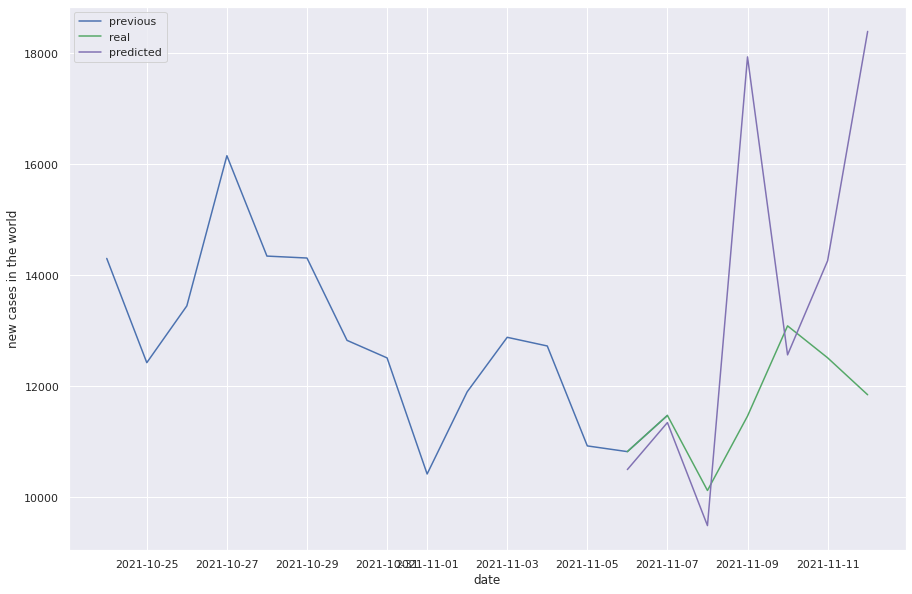

In [74]:
plt.plot(time_series[-21:-6], 'b')
plt.plot(validation_date_range, target_output, 'g')
plt.plot(validation_date_range, predicted_time_series, 'm')
plt.legend(['previous', 'real', 'predicted'])
plt.xlabel('date')
plt.ylabel('new cases in the world'); 

## Model validation results

The results here are from a simple out-of-sample validation on dates 2021-11-06 to 2021-11-12, using all the previous data as input.


| Model, variation | Validation RMSLE | Execution time, s |
|-------|---------------|---------------|
| LenearReg  |    1.34231261   | 0.03        |
| logisticReg |    9.35594189   | 0.28        |
| DecisionTree|    1.24147250  | 0.05        |
| RandomForest |    0.86303301/1.54587416  | 0.82        |
| **get_mix_weekly**| **0.24420219** | 1.19        |

Individually, both 
DecisionTree and RandomForest giving best result.

In conclusion, three regression models are giving most best result when they are added and divided by 4.

# My best model

I choose get_mix_weekly as my best model


In [75]:
my_best_model = get_mix_weekly

# Testing

<span style="color:red">Do not edit beyound this point!</span>

This is a dummy testing routine of `my_best_model`, similar to what will be done after your submission. If your `my_best_model` doesn't work, fix it, not the code here (it will be replaced).

In [76]:
import numpy as np
import pandas as pd
from datetime import timedelta
import time
from sklearn.metrics import mean_squared_log_error

def RMSLE(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))
    
max_prediction_time = 3*60
days_to_predict = 7

url = "https://covid.ourworldindata.org/data/owid-covid-data.csv" 
df = pd.read_csv(url, parse_dates=[3])

testing_end_date = pd.Timestamp(2021,10,25) # you can change this, e.g. to df.date.max()
# testing end date will be 2021.11.22 in the end
testing_start_date = testing_end_date - timedelta(days=days_to_predict-1)
testing_input_end_date = testing_end_date - timedelta(days=days_to_predict) # will be 2021.11.15 in the end - the deadline
print((testing_input_end_date, testing_start_date, testing_end_date))
testing_date_range = pd.date_range(testing_start_date, periods=days_to_predict)

test_input_data = df[df.date <= testing_input_end_date]
test_target_output = df[df.date.isin( testing_date_range ) & (df.iso_code=='OWID_WRL')].new_cases.values

start_time = time.time()
test_predicted_output = my_best_model(test_input_data)
end_time = time.time()
elapsed_time = end_time - start_time

prediction_error = RMSLE(test_target_output, test_predicted_output)
print('Test prediction error: %.8f, time: %.2fs (max %is)' 
    %(prediction_error, elapsed_time, max_prediction_time))  
assert elapsed_time <= max_prediction_time, 'Training is too long!'


(Timestamp('2021-10-18 00:00:00'), Timestamp('2021-10-19 00:00:00'), Timestamp('2021-10-25 00:00:00'))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/p

Test prediction error: 2.76803231, time: 1.12s (max 180s)


## Information on the hardware

Only relavant if execution time is in question: then it is tested on Colab Tesla K80 node.

In [ ]:
import os
osname = os.name
print(osname)
if osname == 'posix':
    f = os.popen('nvidia-smi')
    print(f.read())

    f = os.popen('lscpu')
    print(f.read())
elif osname == 'nt':
    # from https://winaero.com/get-cpu-information-via-command-prompt-in-windows-10/
    f = os.popen('wmic cpu get caption, deviceid, name, numberofcores, maxclockspeed, status')
    print(f.read())

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')